<a href="https://colab.research.google.com/github/juancapeto/prueba/blob/main/Aplicaci%C3%B3n_en_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos y analisis de tablas

**Objetivo: Crear un sistema de recomendación basado en las peliculas y preferencias. Esto con el fin de fidelizar los clientes existentes y atraer nuevos clientes.**

Proceso actual: Una vez se registra en la plataforma, el usuario procede a:

1. Seleccionar pelicula
2. Reproducir pelicula
3. Calificar pelicula (Calificación de 1 a 5) 


**Diseño de la solución**

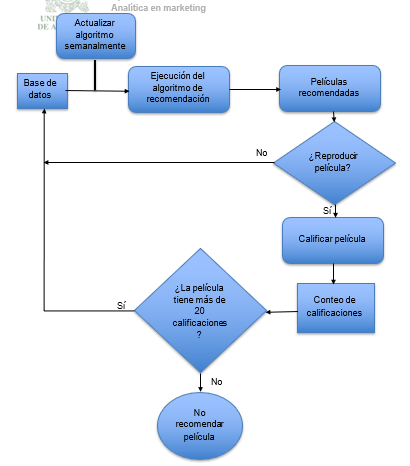

In [ ]:
#Importar datos desde drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#librerias
import numpy as np
import pandas as pd
import sqlite3 as sql

In [ ]:
conn=sql.connect('/content/drive/MyDrive/ANALÍTICA III/Aplicaciones en Marketing/db_movies') #carga bd
cur=conn.cursor()                           #para ejecutar sql

In [ ]:
Tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
Tablas                                       #mirar que tablas hay, inicialmente hay 2 tablas
                                                #ratings y movies

,name
0,ratings
1,movies
2,dataframe
3,moviesfull
4,ratingsfull
5,dataframefull
6,reco


In [ ]:
#Seleccionar tabla de películas
movies = pd.read_sql("SELECT* FROM movies", conn)
movies     #tabla de peliculas

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
#SELECCIONAR TABLA DE RATING
ratings=pd.read_sql("SELECT* FROM ratings", conn)
ratings            #tabla rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


**Analizar tabla de peliculas**

In [ ]:
#TAMAÑO 
movies.shape  #hay 9742 peliculas en la plataforma

(9742, 3)

In [ ]:
#NULOS DE PELICULAS
movies.isnull().sum()  #no hay nulos


movieId    0
title      0
genres     0
dtype: int64

In [ ]:
movies.duplicated().sum()  #no hay duplicados

0

In [ ]:
#EXTRAER AÑO DE PELICULA EN COLUMNA
movies['yearmovie']=movies.title.str.extract('\((\d{4})\)')
movies.head()

,movieId,title,genres,yearmovie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
#QUITAR EL AÑO DEL TITULO
movies['title'] = movies.title.str.replace(' (\(\d\d\d\d\))', '')
movies.head()

<ipython-input-109-8bc69f1ed4bb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['title'] = movies.title.str.replace(' (\(\d\d\d\d\))', '')


,movieId,title,genres,yearmovie
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [ ]:
#SEPARAR LAS CATEGORIAS DE GENRES

from mlxtend.preprocessing import TransactionEncoder   #DIVIDIR POR GENEROS DE PELICULAS
generos=movies['genres'].str.split('|')
te = TransactionEncoder()
generos = te.fit_transform(generos)
generos = pd.DataFrame(generos, columns = te.columns_)

In [ ]:
movies.drop(columns=["genres"], inplace = True)    #se elimina columna de genres
movies= pd.concat([movies,generos], axis = 1)   #se concatenan las tablas de movies y generos
movies.head(3)

,movieId,title,yearmovie,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
dicc = {False: 0, True: 1}   #SE REEMPLAZAN LOS FALSE Y TRUE POR 0 Y 1
movies[generos.columns] = movies[generos.columns].replace(dicc)
movies.head(3)

,movieId,title,yearmovie,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
movies.isnull().sum()  #hay 13 nulos en yearmovie

movieId                0
title                  0
yearmovie             13
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
dtype: int64

In [ ]:
#TRATAR VALORES NULOS DE YEARMOVIE

movies['yearmovie'].fillna('2000',inplace=True) #suponer que fueron peliculas del año 2000

In [ ]:
movies.isnull().sum() #ya no hay nulos

movieId               0
title                 0
yearmovie             0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

In [ ]:
movies.duplicated().sum() #duplicados

0

**Analizar tabla de calificación**

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
#TAMAÑO 
ratings.shape  #hay 100.836 valoraciones

(100836, 4)

In [ ]:
#NULOS
ratings.isnull().sum() #no hay nulos

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
ratings.duplicated().sum() #duplicados

0

In [ ]:
ratings['fecha'] =pd.to_datetime(ratings['timestamp'], unit='s')  #dar formato de fecha
ratings.drop(columns=["timestamp"],inplace=True)
ratings.head(3)

,userId,movieId,rating,fecha
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04


In [ ]:
ratings['yearrating'] = ratings['fecha'].dt.year #extraer año, mes y dia de calificacion en diferente columna
ratings['mes'] = ratings['fecha'].dt.month
ratings['dia'] = ratings['fecha'].dt.day
 

ratings.head()

,userId,movieId,rating,fecha,yearrating,mes,dia
0,1,1,4.0,2000-07-30 18:45:03,2000,7,30
1,1,3,4.0,2000-07-30 18:20:47,2000,7,30
2,1,6,4.0,2000-07-30 18:37:04,2000,7,30
3,1,47,5.0,2000-07-30 19:03:35,2000,7,30
4,1,50,5.0,2000-07-30 18:48:51,2000,7,30


In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'fecha', 'yearrating', 'mes', 'dia'], dtype='object')

In [ ]:
movies.columns  #columna en comun movieId

Index(['movieId', 'title', 'yearmovie', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
#SE CREA UN SOLO DATAFRAME, UNIENDO POR MEDIO DE UNA COLUMNA EN COMUN (movieId)

df= pd.merge(left=ratings,right=movies, left_on='movieId', right_on='movieId')
df

,userId,movieId,rating,fecha,yearrating,mes,dia,title,yearmovie,(no genres listed),...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,2000,7,30,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,1996-11-08 06:36:02,1996,11,8,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,2005-01-25 06:52:26,2005,1,25,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,2017-11-13 12:59:30,2017,11,13,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,2011-05-18 05:28:03,2011,5,18,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,2016-11-19 08:55:49,2016,11,19,Bloodmoon,1997,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,2016-11-19 08:43:18,2016,11,19,Sympathy for the Underdog,1971,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,2017-05-03 20:53:14,2017,5,3,Hazard,2005,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,2017-05-03 21:59:49,2017,5,3,Blair Witch,2016,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.columns

Index(['userId', 'movieId', 'rating', 'fecha', 'yearrating', 'mes', 'dia',
       'title', 'yearmovie', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
df.shape  #DATAFRAME FINAL 100.836

(100836, 29)

In [ ]:
df.isnull().sum() #no hay nulos

userId                0
movieId               0
rating                0
fecha                 0
yearrating            0
mes                   0
dia                   0
title                 0
yearmovie             0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

In [ ]:
df.duplicated().sum() #no hay duplicados

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   userId              100836 non-null  int64         
 1   movieId             100836 non-null  int64         
 2   rating              100836 non-null  float64       
 3   fecha               100836 non-null  datetime64[ns]
 4   yearrating          100836 non-null  int64         
 5   mes                 100836 non-null  int64         
 6   dia                 100836 non-null  int64         
 7   title               100836 non-null  object        
 8   yearmovie           100836 non-null  object        
 9   (no genres listed)  100836 non-null  int64         
 10  Action              100836 non-null  int64         
 11  Adventure           100836 non-null  int64         
 12  Animation           100836 non-null  int64         
 13  Children            100836 no

**UNA VEZ SE UNEN LOS TABLAS, SE GENERA UN SOLO DATAFRAME CON TODA LA INFORMACION NECESARIA,CON ESTE DATAFRAME SE TRABAJARÁ Y SE PROCEDERÁ A OBTENER MAYOR INFORMACION DE ACUERDO A UN ANALISIS EXPLORATORIO**

# **Análisis exploratorio**

In [ ]:
 df.to_sql("dataframe",conn,if_exists='replace') #SE GUARDA COMO LA TABLA DATAFRAME

100836

In [ ]:
 #movies.to_sql("movies",conn,if_exists='replace') #SE GUARDA COMO LA TABLA movies

In [ ]:
 #ratings.to_sql("ratings",conn,if_exists='replace') #SE GUARDA COMO LA TABLA ratings

In [ ]:
df #dataframe 

,userId,movieId,rating,fecha,yearrating,mes,dia,title,yearmovie,(no genres listed),...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,2000,7,30,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,1996-11-08 06:36:02,1996,11,8,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,2005-01-25 06:52:26,2005,1,25,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,2017-11-13 12:59:30,2017,11,13,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,2011-05-18 05:28:03,2011,5,18,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,2016-11-19 08:55:49,2016,11,19,Bloodmoon,1997,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,2016-11-19 08:43:18,2016,11,19,Sympathy for the Underdog,1971,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,2017-05-03 20:53:14,2017,5,3,Hazard,2005,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,2017-05-03 21:59:49,2017,5,3,Blair Witch,2016,0,...,0,1,0,0,0,0,0,1,0,0


**Distribución de calificaciones ratings**

In [ ]:
# VER COMO ESTAN DISTRIBUIDOS LOS RATINGS

ratingmovies=pd.read_sql("select rating as calificacion,count(*) as total from dataframe group by rating order by total desc",conn)
ratingmovies

,calificacion,total
0,4.0,26818
1,3.0,20047
2,5.0,13211
3,3.5,13136
4,4.5,8551
5,2.0,7551
6,2.5,5550
7,1.0,2811
8,1.5,1791
9,0.5,1370


**Peliculas más calificadas**

In [ ]:
#¿ CUALES SON LAS PELICULAS MAS CALIFICADAS(VISTAS)?

pd.read_sql("select title as titulo,count(*) as totalcalificaciones from dataframe group by title order by totalcalificaciones desc",conn)


,titulo,totalcalificaciones
0,Forrest Gump,329
1,"Shawshank Redemption, The",317
2,Pulp Fiction,307
3,"Silence of the Lambs, The",279
4,"Matrix, The",278
...,...,...
9441,'night Mother,1
9442,'Tis the Season for Love,1
9443,'Salem's Lot,1
9444,'Hellboy': The Seeds of Creation,1


In [ ]:
#FILTRAR PELICULAS CON MAS DE 20 CALIFICACIONES

pd.read_sql("select title as titulo,count(*) as total from dataframe group by title having total>=20 order by total desc",conn)


,titulo,total
0,Forrest Gump,329
1,"Shawshank Redemption, The",317
2,Pulp Fiction,307
3,"Silence of the Lambs, The",279
4,"Matrix, The",278
...,...,...
1301,Barb Wire,20
1302,"Animatrix, The",20
1303,Adventures in Babysitting,20
1304,"6th Day, The",20


**Total de peliculas calificadas por cada usuario**

In [ ]:
# CADA USUARIO CUANTAS PELICULAS CALIFICÓ

usuarios=pd.read_sql("select userId as usuario,count(*) as totalcalificaciones from dataframe group by userId order by totalcalificaciones desc",conn)
usuarios  #3 usuarios calificaron mas de 2 mil peliculas

,usuario,totalcalificaciones
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
...,...,...
605,207,20
606,194,20
607,189,20
608,147,20


In [ ]:
usuarios.describe() #ESTADISTICAS

,usuario,totalcalificaciones
count,610.000000,610.000000
mean,305.500000,165.304918
std,176.236111,269.480584
min,1.000000,20.000000
25%,153.250000,35.000000
50%,305.500000,70.500000
75%,457.750000,168.000000
max,610.000000,2698.000000


In [ ]:
      #GRAFICO
import plotly.express as px
fig=px.histogram(usuarios, x='totalcalificaciones', title='Total calificaciones por usuario')
fig.show() #SE IDENTIFICA QUE FUERON POCOS LOS USUARIOS QUE CALIFICARON MAS DE 1.000 PELICULAS

In [ ]:
#FILTRAR LOS USUARIOS QUE CALIFICARON MENOS DE 1.000 PELICULAS
ratingsuser=pd.read_sql("select userId as usuario,count(*) as totalcalificaciones from dataframe group by userId having totalcalificaciones <=1000 order by totalcalificaciones desc",conn)
ratingsuser

,usuario,totalcalificaciones
0,182,977
1,307,975
2,603,943
3,298,939
4,177,904
...,...,...
593,207,20
594,194,20
595,189,20
596,147,20


In [ ]:
#GRAFICO
fig=px.histogram(ratingsuser, x='totalcalificaciones', title='Total calificaciones por usuario')
fig.show()

**Año con mayores calificaciones (VISTAS)**

In [ ]:
# ¿ EN QUE AÑO SE HICIERON MAS CALIFICACIONES ?

cal=pd.read_sql("select yearrating as años,count(*) as total from dataframe group by yearrating order by total desc",conn)
cal

,años,total
0,2000,10061
1,2017,8198
2,2007,7114
3,2016,6703
4,2015,6616
5,2018,6418
6,1996,6040
7,2005,5813
8,2012,4656
9,2008,4351


In [ ]:
#GRAFICAR
import plotly.graph_objs as go
a= go.Bar( x=cal.años	,y=cal.total, text= cal.total)
Layout=go.Layout(title="Ranking de Views x años",xaxis={'title':' Años'},yaxis={'title':'Cantidad de Visualizaciones'})
go.Figure(a,Layout)

**Generos con mayores calificaciones**

In [ ]:
df.columns

Index(['userId', 'movieId', 'rating', 'fecha', 'yearrating', 'mes', 'dia',
       'title', 'yearmovie', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
# CUALES SON LOS GENEROS CON MAYORES VISUALIZACIONES

ge=pd.read_sql("select SUM(Action) as Action, SUM(Adventure) as Adventure, SUM(Animation) as Animation, SUM(Children) as Children, SUM(Comedy) as Comedy,SUM(Crime) as Crime, SUM(Documentary) as Documentary,SUM(Drama) as Drama,  SUM(Fantasy) as Fantasy, SUM('Film-Noir') as FilmNoir, SUM(Horror) as Horror,SUM(IMAX) as IMAX, SUM(Musical) as Musical,SUM(Mystery) as Mystery,SUM(Romance) as Romance,SUM ('Sci-Fi') as SciFi, SUM(Thriller) as Thriller,SUM(War) as War,SUM(Western) as Western from dataframe",conn)


In [ ]:
ge = ge.transpose().reset_index()  #poner vertical
ge= ge.rename(columns={'index': 'genero',0:'totalviews'}).sort_values('totalviews', axis=0, ascending=False)   #RENOMBRAR INDEX
ge

,genero,totalviews
7,Drama,41928.0
4,Comedy,39053.0
0,Action,30635.0
16,Thriller,26452.0
1,Adventure,24161.0
14,Romance,18124.0
5,Crime,16681.0
8,Fantasy,11834.0
3,Children,9208.0
13,Mystery,7674.0


In [ ]:
#GRAFICAR
import plotly.graph_objs as go
a= go.Bar( x=ge.genero	,y=ge.totalviews, text= ge.totalviews)
Layout=go.Layout(title="Ranking de Géneros",xaxis={'title':' Géneros'},yaxis={'title':'Cantidad de Visualizaciones'})
go.Figure(a,Layout)

**Peliculas con mejores calificaciones promedio de acuerdo al total de vistas**

In [ ]:
# ¿CUAL PELICULA TUVO LA MEJOR CALIFICACIÓN PROMEDIO?

pro=pd.read_sql("select title,count(*) as totalvistas,AVG(rating) as promRating from dataframe group by title order by totalvistas desc",conn).head(10)
pro.head()

,title,totalvistas,promRating
0,Forrest Gump,329,4.164134
1,"Shawshank Redemption, The",317,4.429022
2,Pulp Fiction,307,4.197068
3,"Silence of the Lambs, The",279,4.161290
4,"Matrix, The",278,4.192446


In [ ]:
#GRAFICO
import plotly.graph_objs as go
data = go.Bar( x=pro.title,y=pro.promRating,text = pro.promRating )
Layout=go.Layout(title="Mejores 10 peliculas vistas y calificadas",xaxis={'title':' Película'},yaxis={'title':'Calificación Promedio'})
go.Figure(data,Layout)

**Mejores peliculas calificadas por año de calificacion**

In [ ]:
# MEJORES PELICULAS X AÑO
pa=pd.read_sql("select yearrating,title,count(*) as totalcalificaciones,AVG(rating) as promRating from dataframe group by title order by totalcalificaciones desc limit 15",conn)
pa

,yearrating,title,totalcalificaciones,promRating
0,2000,Forrest Gump,329,4.164134
1,2015,"Shawshank Redemption, The",317,4.429022
2,2000,Pulp Fiction,307,4.197068
3,2000,"Silence of the Lambs, The",279,4.161290
4,2000,"Matrix, The",278,4.192446
5,2000,Star Wars: Episode IV - A New Hope,251,4.231076
6,2000,Jurassic Park,238,3.750000
7,2000,Braveheart,237,4.031646
8,1996,Terminator 2: Judgment Day,224,3.970982
9,2000,Schindler's List,220,4.225000


**Mejores peliculas calificadas por año de lanzamiento**

In [ ]:
pd.read_sql("select yearmovie,title,count(*) as totalcalificaciones,AVG(rating) as promRating from dataframe group by title order by totalcalificaciones desc limit 15",conn)

,yearmovie,title,totalcalificaciones,promRating
0,1994,Forrest Gump,329,4.164134
1,1994,"Shawshank Redemption, The",317,4.429022
2,1994,Pulp Fiction,307,4.197068
3,1991,"Silence of the Lambs, The",279,4.161290
4,1999,"Matrix, The",278,4.192446
5,1977,Star Wars: Episode IV - A New Hope,251,4.231076
6,1993,Jurassic Park,238,3.750000
7,1995,Braveheart,237,4.031646
8,1991,Terminator 2: Judgment Day,224,3.970982
9,1993,Schindler's List,220,4.225000


**Visualizaciones por meses**

In [ ]:
# ¿CUAL FUE EL MES CON MAYOR VISUALIZACIÓN?
mes=pd.read_sql("select mes,count(*) as total from dataframe group by mes order by total desc",conn)
mes = mes.replace({
     1:'Enero',
    2:'Febrero',
    3:'Marzo',
    4:'Abril',
    5:'Mayo',
    6:'Junio',
    7:'Julio',
    8:'Agosto',
    9:'Septiembre',
    10:'Octubre',
    11:'Noviembre',
    12:'Diciembre'
})
mes

,mes,total
0,Mayo,10883
1,Noviembre,9676
2,Agosto,9074
3,Marzo,8880
4,Junio,8825
5,Enero,8684
6,Septiembre,8510
7,Abril,7727
8,Febrero,7635
9,Octubre,7148


In [ ]:
#GRAFICO
import plotly.graph_objs as go
data = go.Bar( x=mes.mes,y=mes.total,text = mes.total )
Layout=go.Layout(title="Visualizaciones por meses",xaxis={'title':' Mes'},yaxis={'title':'Total Views'})
go.Figure(data,Layout)

**Visualizaciones x día de mes**

In [ ]:
dia=pd.read_sql("select dia,count(*) as total from dataframe group by dia order by total desc",conn)
dia

,dia,total
0,17,4404
1,3,4404
2,22,4312
3,18,4311
4,14,4133
5,27,4129
6,21,3925
7,11,3716
8,9,3702
9,2,3668


In [ ]:
#GRAFICO
import plotly.graph_objs as go
data = go.Bar( x=dia.dia,y=dia.total,text = dia.total )
Layout=go.Layout(title="Visualizaciones por dia",xaxis={'title':' Dia'},yaxis={'title':'Total Views'})
go.Figure(data,Layout)   #dias mas frecuentes para ver peli 3 y 17 

#**Analisis de personas y peliculas que se calificaron**

In [ ]:
#SE FILTRARAN LOS USUARIOS QUE CALIFICARON MENOS DE 1000 PELICULAS
ratingsuser=pd.read_sql("select userId as userId,count(*) as totalcalificaciones from dataframe group by userId having totalcalificaciones <=1000 order by totalcalificaciones desc",conn)

ratingsuser

#se pasa de 606 usuarios a 598

,userId,totalcalificaciones
0,182,977
1,307,975
2,603,943
3,298,939
4,177,904
...,...,...
593,207,20
594,194,20
595,189,20
596,147,20


In [ ]:
#SE FILTRARAN LAS PELICULAS QUE TUVIERON MAS DE 20 CALIFICACIONES
# DEBIDO A QUE EL USUARIO QUE MENOS CALIFICO PELICULAS, CALIFICÓ  UN TOTAL DE 20

moviesc=pd.read_sql("select title as title,count(*) as total from dataframe group by title having total>=20 order by total desc",conn)
moviesc

,title,total
0,Forrest Gump,329
1,"Shawshank Redemption, The",317
2,Pulp Fiction,307
3,"Silence of the Lambs, The",279
4,"Matrix, The",278
...,...,...
1301,Barb Wire,20
1302,"Animatrix, The",20
1303,Adventures in Babysitting,20
1304,"6th Day, The",20


In [ ]:
pd.read_sql("select title as title,count(*) as total from dataframe group by title order by total desc",conn)

,title,total
0,Forrest Gump,329
1,"Shawshank Redemption, The",317
2,Pulp Fiction,307
3,"Silence of the Lambs, The",279
4,"Matrix, The",278
...,...,...
9441,'night Mother,1
9442,'Tis the Season for Love,1
9443,'Salem's Lot,1
9444,'Hellboy': The Seeds of Creation,1


In [ ]:
#AHORA SE PROCEDE A DELIMITAR LAS TABLAS DE MOVIES Y RATINGS

movies2=pd.merge(left=movies,right=moviesc, left_on='title', right_on='title')
movies2=movies2.drop(['total'], axis=1)  #eliminar columna
movies2  #peliculas con mas de 20 calificaciones Y usuarios con menos de 1000 calificaciones

,movieId,title,yearmovie,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,Heat,1995,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,148626,"Big Short, The",2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1414,152081,Zootopia,2016,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1415,164179,Arrival,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1416,166528,Rogue One: A Star Wars Story,2016,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#ususarios con menos de 1000 calificaciones
ratings2=pd.merge(left=ratings,right=ratingsuser, left_on='userId', right_on='userId')
ratings2=ratings2.drop(['totalcalificaciones'], axis=1)  #eliminar columna
ratings2  #usuarios que calificaron menos de 1000 peliculas

,userId,movieId,rating,fecha,yearrating,mes,dia
0,1,1,4.0,2000-07-30 18:45:03,2000,7,30
1,1,3,4.0,2000-07-30 18:20:47,2000,7,30
2,1,6,4.0,2000-07-30 18:37:04,2000,7,30
3,1,47,5.0,2000-07-30 19:03:35,2000,7,30
4,1,50,5.0,2000-07-30 18:48:51,2000,7,30
...,...,...,...,...,...,...,...
82314,609,892,3.0,1996-11-05 19:11:20,1996,11,5
82315,609,1056,3.0,1996-11-05 19:11:20,1996,11,5
82316,609,1059,3.0,1996-11-05 19:10:54,1996,11,5
82317,609,1150,4.0,1996-11-05 19:10:54,1996,11,5


In [ ]:
#Se unen los dos dataframes anteriores para dejar un dataframe full

df1= pd.merge(left=ratings2,right=movies2, left_on='movieId', right_on='movieId')
df1  #tabla con las peliculas de mas de 20 calificaciones y usuarios con menos de 1000 calificaciones

,userId,movieId,rating,fecha,yearrating,mes,dia,title,yearmovie,(no genres listed),...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,2000,7,30,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,1996-11-08 06:36:02,1996,11,8,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,2005-01-25 06:52:26,2005,1,25,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,2017-11-13 12:59:30,2017,11,13,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,2011-05-18 05:28:03,2011,5,18,Toy Story,1995,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60016,554,2820,4.0,1999-12-11 08:38:34,1999,12,11,Hamlet,1964,0,...,0,0,0,0,0,0,0,0,0,0
60017,562,7079,4.5,2013-05-18 17:00:37,2013,5,18,"Hunchback of Notre Dame, The",1939,0,...,0,0,0,0,0,0,0,0,0,0
60018,590,26152,2.5,2009-11-17 03:06:13,2009,11,17,Batman,1966,0,...,0,0,0,0,0,0,0,0,0,0
60019,605,26152,3.0,2010-06-21 05:14:17,2010,6,21,Batman,1966,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.isnull().sum() #no hay nulos

userId                0
movieId               0
rating                0
fecha                 0
yearrating            0
mes                   0
dia                   0
title                 0
yearmovie             0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

In [ ]:
#guardar como tablas

movies2.to_sql("moviesfull",conn,if_exists='replace') #SE GUARDA COMO LA TABLA moviesfull
ratings2.to_sql("ratingsfull",conn,if_exists='replace') #SE GUARDA COMO LA TABLA ratingsfull
df1.to_sql("dataframefull",conn,if_exists='replace') #SE GUARDA COMO LA TABLA dataframefull

60021

# **Modelo: Popularidad**

**Recomendaciones basado en popularidad**

In [ ]:
#HACE MAS PARTE DE UN ANALISIS EXPLORATORIO

In [ ]:
# LOS 10 MAS VISTAS

pd.read_sql("select title as titulo,count(*) as total from dataframefull group by title order by total desc limit 10",conn)

,titulo,total
0,Forrest Gump,317
1,"Shawshank Redemption, The",306
2,Pulp Fiction,295
3,"Silence of the Lambs, The",267
4,"Matrix, The",266
5,Star Wars: Episode IV - A New Hope,239
6,Jurassic Park,226
7,Braveheart,226
8,Terminator 2: Judgment Day,212
9,Schindler's List,212


In [ ]:
#LAS 10 MAS VISTAS CON MEJORES RATING

pd.read_sql("select title,count(*) as totalvistas,AVG(rating) as promRating from dataframefull group by title order by totalvistas desc limit 10",conn)

,title,totalvistas,promRating
0,Forrest Gump,317,4.170347
1,"Shawshank Redemption, The",306,4.444444
2,Pulp Fiction,295,4.181356
3,"Silence of the Lambs, The",267,4.157303
4,"Matrix, The",266,4.187970
5,Star Wars: Episode IV - A New Hope,239,4.209205
6,Jurassic Park,226,3.754425
7,Braveheart,226,4.033186
8,Terminator 2: Judgment Day,212,3.962264
9,Schindler's List,212,4.219340


In [ ]:
#MEJORES PELICULAS CALIFICADAS POR AÑO DE CALIFICACION
pd.read_sql("select yearrating,title,count(*) as total ,AVG(rating) as promRating from dataframefull group by title order by total desc limit 10",conn)

,yearrating,title,total,promRating
0,2000,Forrest Gump,317,4.170347
1,2015,"Shawshank Redemption, The",306,4.444444
2,2000,Pulp Fiction,295,4.181356
3,2000,"Silence of the Lambs, The",267,4.157303
4,2000,"Matrix, The",266,4.187970
5,2000,Star Wars: Episode IV - A New Hope,239,4.209205
6,2000,Jurassic Park,226,3.754425
7,2000,Braveheart,226,4.033186
8,1996,Terminator 2: Judgment Day,212,3.962264
9,2000,Schindler's List,212,4.219340


In [ ]:
#MEJORES PELICULAS CALIFICADAS POR AÑO LANZAMIENTO
pd.read_sql("select yearmovie,title,count(*) as total ,AVG(rating) as promRating from dataframefull group by title order by total desc limit 10",conn)

,yearmovie,title,total,promRating
0,1994,Forrest Gump,317,4.170347
1,1994,"Shawshank Redemption, The",306,4.444444
2,1994,Pulp Fiction,295,4.181356
3,1991,"Silence of the Lambs, The",267,4.157303
4,1999,"Matrix, The",266,4.187970
5,1977,Star Wars: Episode IV - A New Hope,239,4.209205
6,1993,Jurassic Park,226,3.754425
7,1995,Braveheart,226,4.033186
8,1991,Terminator 2: Judgment Day,212,3.962264
9,1993,Schindler's List,212,4.219340


In [ ]:
#NO PUEDO RECOMENDAR UN GENERO
#RECOMIENDO PELICULAS MAS VISTAS Y CON MEJOR PUNTAJE

# **Modelo: Recomendaciones basado en contenido un solo producto**

In [ ]:
peliculas = movies2.drop(columns=['movieId','title'])  #ELIMINO COLUMNAS QUE NO SE VAN A UTILIZAR
peliculas.head(1)  #yearmovie y genero

,yearmovie,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1995,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
                 #CONVERTIR A DUMYY EL AÑOMOVIE
peliculas= pd.get_dummies(peliculas,columns=["yearmovie"])  

In [ ]:
peliculas.head()

In [ ]:
pelicu='Jumanji'  #A partir de esta pelicula cual me recomienda

In [ ]:
#CORRELACIONES

ind_pel = movies2[movies2["title"]== pelicu].index.values.astype(int)[0]
correlaciones = peliculas.corrwith(peliculas.iloc[ind_pel,:],axis=1)
corr = correlaciones  #Analisis de manera manual CORRELACION
corr

0       0.808372
1       1.000000
2       0.264504
3       0.336239
4       0.220297
          ...   
1413   -0.027731
1414    0.379690
1415   -0.027731
1416    0.422744
1417   -0.034129
Length: 1418, dtype: float64

In [ ]:
                            #ALGORITMO RECOMENDACION

from ipywidgets import interact 
def recomendacion(pelicu = list(movies2['title'])):
     
    ind_pel=peliculas[movies2['title']==pelicu].index.values.astype(int)[0]   
    similar_peli = peliculas.corrwith(peliculas.iloc[ind_pel,:],axis=1)
    similar_peli = similar_peli.sort_values(ascending=False)
    top_similar_peli=similar_peli.to_frame(name="correlation").iloc[1:10,]
    top_similar_peli['title']=movies2["title"]
    
    return top_similar_peli


print(interact(recomendacion))

interactive(children=(Dropdown(description='pelicu', options=('Toy Story', 'Jumanji', 'Grumpier Old Men', 'Fat…

<function recomendacion at 0x7faa3e96ee50>


**POR MEDIO DE ESTE MODELO SE RECOMENDA UNA PELICULA BASADA EN CORRELACION CON LA PELICULA SELECCIONADA O VISTA A PARTIR DE CARACTERISTICAS COMO EL GENERO Y AÑO DE LANZAMIENTO.**

# **Modelo: Sistema de recomendacion basado en contenido KNN. Un solo producto visto**

In [ ]:
from sklearn import neighbors
model = neighbors.NearestNeighbors(n_neighbors=10, metric='cosine')  #metrica de coseno
model.fit(peliculas)
dist, idlist = model.kneighbors(peliculas)

distancias=pd.DataFrame(dist)
id_list=pd.DataFrame(idlist)

movie_name='Turbo'

def movieRecommender(movie_name = list(movies2['title'].value_counts().index)):
    movie_list_name = []
    movie_id = movies2[movies2['title'] == movie_name].index
    movie_id = movie_id[0]
    for newid in idlist[movie_id]:
        movie_list_name.append(movies2.loc[newid].title)
    return movie_list_name



print(interact(movieRecommender))

interactive(children=(Dropdown(description='movie_name', options=('Hamlet', 'Misérables, Les', 'Three Musketee…

<function movieRecommender at 0x7faa3ec23940>


In [ ]:
print(interact(movieRecommender))

interactive(children=(Dropdown(description='movie_name', options=('Hamlet', 'Misérables, Les', 'Three Musketee…

<function movieRecommender at 0x7faa3ec23940>


**ESTE MODELO RECOMIENDA LAS PELICULAS BASADAS EN LAS CARACTERISTICAS SIMILARES DE LA PELICULA ANTERIORMENTE SELECCIONADA O VISTA**

# **Modelo: Sistema de recomendacion basado en contenido KNN. Con base en todo lo visto por el usuario**

In [ ]:
pip install surprise  #instalar surprise

In [ ]:
#librerias
import numpy as np
import pandas as pd
import sqlite3 as sql
from sklearn.preprocessing import MinMaxScaler
from ipywidgets import interact ## para análisis interactivo
from sklearn import neighbors ### basado en contenido un solo producto consumido

from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import train_test_split

In [ ]:
# peliculas    tabla de generos y año de pelicula en dumy

peliculas.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       ...
       'yearmovie_2008', 'yearmovie_2009', 'yearmovie_2010', 'yearmovie_2011',
       'yearmovie_2012', 'yearmovie_2013', 'yearmovie_2014', 'yearmovie_2015',
       'yearmovie_2016', 'yearmovie_2017'],
      dtype='object', length=105)

In [ ]:
usuarios=pd.read_sql('select distinct userId as user_id from ratingsfull',conn)
usuarios   #lista de usuarios

,user_id
0,1
1,2
2,3
3,4
4,5
...,...
593,604
594,605
595,607
596,608


In [ ]:
user_id=5 #defino usuario

In [ ]:
#algoritmo

def recomendar(user_id=list(usuarios['user_id'].value_counts().index)):
    
    ###seleccionar solo los ratings del usuario seleccionado
    ratings=pd.read_sql('select userId,movieId,rating from ratingsfull where userId=:user',conn, params={'user':user_id})
    ###convertir ratings del usuario a array
    l_movies_r=ratings['movieId'].to_numpy()
    
    ###agregar la columna de movieId y titulo de la peli a dummie para filtrar y mostrar nombre
    peliculas[['movieId','title']]=movies2[['movieId','title']]
    movies_r=peliculas[peliculas['movieId'].isin(l_movies_r)] #filtrar peliculas q el ususario vio
    movies_r=movies_r.drop(columns=['movieId','title'])  #queda solo el genero y yearmovie en dumy,de las peli que ha visto el usuario
    movies_r["indice"]=1 ### para usar group by y que quede en formato pandas tabla de centroide
    centroide=movies_r.groupby("indice").mean()   #centroide
    
    #peliculas no vistas
    movies_nr=peliculas[~peliculas['movieId'].isin(l_movies_r)]  #peli no vistas
    movies_nr=movies_nr.drop(columns=['movieId','title'])  #elimina columna movieid y title
    model=neighbors.NearestNeighbors(n_neighbors=10, metric='cosine')
    model.fit(movies_nr)
    dist, idlist = model.kneighbors(centroide)
    
    ids=idlist[0]
    recomend_b=peliculas.loc[ids][['title','movieId']]
    vistos=peliculas[peliculas['movieId'].isin(l_movies_r)][['title','movieId']]
    
    return recomend_b



In [ ]:
print(interact(recomendar))  #se imprime la recomendación para el usuario de acuerdo a la relacion entre las peliculas vistas y no vistas


,title,movieId
887,Big Trouble in Little China,3740
377,Dead Poets Society,1246
42,Happy Gilmore,104
155,Demolition Man,442
610,Charlotte's Web,49647
1163,Meet the Fockers,30825
120,While You Were Sleeping,339
769,From Russia with Love,2948
39,Broken Arrow,95
44,Muppet Treasure Island,107


El modelo recomienda la pelicula de acuerdo a las vistas por el usuario, de acuerdo a un centroide.

# **Modelo: sistema de recomendacion filtro colaborativo basado en el ususario**

In [ ]:
#algoritmo

ratings=pd.read_sql('select * from ratingsfull', conn)  #seleccionar puntajes
pd.read_sql('select avg(rating) from ratingsfull', conn) ## promedio de ratings
###### leer datos desde tabla de pandas
watcher = Reader(rating_scale=(0.5,5))  #escala



###las columnas deben estar en orden estándar: user item rating
data   = Dataset.load_from_df(ratings2[['userId','movieId','rating']], watcher)
data



#####Existen varios modelos 

models=[KNNBasic(),KNNWithMeans(),KNNWithZScore(),KNNBaseline()] 
results = {}




for model in models:
 
    CV_scores = cross_validate(model, data, measures=["MAE","RMSE"], cv=5, n_jobs=-1)  
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).\
             rename({'test_mae':'MAE', 'test_rmse': 'RMSE'})
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result



performance_df = pd.DataFrame.from_dict(results).T   #transfusion
performance_df.sort_values(by='RMSE')


#EL MEJOR FUE EL MODELO KNNBASELINE CON MENOR MAE Y RSME

###knnBasiscs: calcula el rating ponderando por distancia con usuario/Items
###KnnWith means: en la ponderación se resta la media del rating, y al final se suma la media general
####KnnwithZscores: estandariza el rating restando media y dividiendo por desviación 
####Knnbaseline: calculan el desvío de cada calificación con respecto al promedio y con base en esos calculan la ponderación

,MAE,RMSE,fit_time,test_time
knns.KNNBaseline,0.691239,0.906203,0.373194,2.363172
knns.KNNWithMeans,0.705903,0.924104,0.209705,2.108951
knns.KNNWithZScore,0.701483,0.924861,0.219622,1.855079
knns.KNNBasic,0.748860,0.982261,0.095469,1.523653


In [ ]:
param_grid = { 'sim_options' : {'name': ['msd','cosine'],    #GRILLA DE HIPERPARAMETROS
                                'min_support': [5,10],             #minimo elemento para prediccion
                                'user_based': [False, True]}          #basado en item y usuario
             }

In [ ]:
gridsearchKNNBaseline = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], \
                                      cv=2, n_jobs=2)   #ejecuto

In [ ]:
gridsearchKNNBaseline.fit(data)   #entreno  #n

In [ ]:
gridsearchKNNBaseline.best_params["rmse"]
#parametros modelo seleccionado

{'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}

In [ ]:
gridsearchKNNBaseline.best_score["rmse"]  #puntaje

0.9215654760722554

In [ ]:
gs_model=gridsearchKNNBaseline.best_estimator['rmse'] ### mejor estimador de gridsearc

# **Predicciones**

In [ ]:
################# Realizar predicciones

trainset = data.build_full_trainset() ### esta función convierte todos los datos en entrenamiento
model=gs_model.fit(trainset) ## se entrena sobre todos los datos posibles

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
predset = trainset.build_anti_testset() ### crea una tabla con todos los usuarios y las movies que no han visto
#### en la columna de rating pone el promedio de todos los rating, en caso de que no pueda calcularlo para un item-usuario

In [ ]:
predictions = model.test(predset) ### función muy pesada, hace las predicciones de rating para todos las peliculas que no ha visto un usuario
### la funcion test recibe un test set constriuido con build_test method, o el que genera crosvalidate

In [ ]:
predictions_df = pd.DataFrame(predictions) ### esta tabla se puede llevar a una base donde estarán todas las predicciones

In [ ]:
predictions_df['r_ui'].unique()

array([3.55441028])

In [ ]:
predictions_df.sort_values(by='est',ascending=False)

In [ ]:
####### la predicción se puede hacer para una pelicula puntual
model.predict(uid='31226', iid='0373825013',r_ui='2.42')

Prediction(uid='31226', iid='0373825013', r_ui='2.42', est=3.5544102819519185, details={'was_impossible': False})

In [ ]:
##### funcion para recomendar las 10 peli con mejores predicciones y llevar base de datos para consultar resto de información
def recomendaciones(user_id,n_recomend=10):
    
    predictions_userID = predictions_df[predictions_df['uid'] == user_id].\
                    sort_values(by="est", ascending = False).head(n_recomend)

    recomendados = predictions_userID[['iid','est']]
    recomendados.to_sql('reco',conn,if_exists="replace")
    
    recomendados=pd.read_sql('''select a.*, b.title 
                             from reco a left join movies b
                             on a.iid=b.movieId ''', conn)

    return(recomendados)



In [ ]:
us1=recomendaciones(user_id=10,n_recomend=10)
us1

,index,iid,est,title
0,73945,171763,4.937096,Baby Driver (2017)
1,72828,119155,4.265580,Night at the Museum: Secret of the Tomb (2014)
2,72642,4519,4.205653,"Land Before Time, The (1988)"
3,74419,42725,3.957569,Grandma's Boy (2006)
4,72602,2089,3.941271,"Rescuers Down Under, The (1990)"
5,73560,117881,3.931682,Still Alice (2014)
6,73685,149406,3.920111,Kung Fu Panda 3 (2016)
7,76981,5784,3.894464,Ghost Ship (2002)
8,75961,43560,3.885581,Nanny McPhee (2005)
9,72748,78637,3.861350,Shrek Forever After (a.k.a. Shrek: The Final C...
